# Mental Health Within The Workplace

## Introduction

Mental health today is quite a sensitive topic to discuss with one another. Even among close friend groups, the subject doesn't come up too often due to the fear of being judged or receiving negative backlash. This is even more so within the workplace when the workplace should be one of the most important places to talk about it as people spend a a good amount of their day at work, and letting factors that drag your mental health around could really affect work productivity. 

The topic is so sensitive to talk about because people are afraid of being judged for something they may not be able to control. Discussing these issues may damage relationships or start unwarranted rumors to spread throughout the company, or worse losing their jobs and risking future opportunities from future employers learning about these concerns. 

Many times, these issues go unspoken as people keep these issues to themselves out of fear or embarassement. These mental health issues can certainly affect work productivity thus costing employers and companies possibly exponetial amounts of money lost throughout the year. Issues such as anxiety and depression are more common than we think just because these problems often go under the radar. 

Employers should encourage their workers to voice any concern towards mental health as it may put them in a direction to seeking help and get back on track to being happier, more productive, and improve their overall performance if they're provided with resources necessary to seek help or even having the option to take a sickday to reset from being too overwhelmed. 

Throughout this analysis, i'll be exploring a data set consisiting of responses to mental health and various benefits/resources that a their work may or may not offer within the work place survey that was conducted in 2014. From the data, I'll draw out different insights and observations as I try to answer various questions throughout the exploratory analysis. 

The survey consists of over 1200 responses and was conducted by Open Sourcing Mental Illness, LTD (OSMI). The original dataset can be downloaded at: https://osmihelp.org/research

## Data and library imports 

In [69]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data content
* **Timestamp**
* **Age**
* **Gender**
* **Country**
* **state:** If you live in the United States, which state or territory do you live in?
* **self_employed:** Are you self-employed?
* **family_history:** Do you have a family history of mental illness?
* **treatment:** Have you sought treatment for a mental health condition?
* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
* **no_employees:** How many employees does your company or organization have?
* **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
* **tech_company:** Is your employer primarily a tech company/organization?
* **benefits:** Does your employer provide mental health benefits?
* **care_options:** Do you know the options for mental health care your employer provides?
* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave:** How easy is it for you to take medical leave for a mental health condition?
* **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
* **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
* **supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* **mentalhealthinterview:** Would you bring up a mental health issue with a potential employer in an interview?
* **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?
* **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?
* **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* **comments:** Any additional notes or comments

In [2]:
# Load data into a dataframe
mental_health_df = pd.read_csv("Mental Health.csv")
pd.set_option('display.max_columns', None)
mental_health_df.head(100)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014-08-27 12:15:30,29,male,United States,MN,No,No,No,Never,26-100,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,No,No,NaN
96,2014-08-27 12:16:21,24,Male,United States,MO,No,Yes,No,Rarely,26-100,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
97,2014-08-27 12:17:01,31,male,Mexico,NaN,No,Yes,Yes,Sometimes,6-25,No,Yes,Don't know,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Yes,No,No,NaN
98,2014-08-27 12:18:02,33,Cis Male,United States,AZ,No,No,Yes,Sometimes,6-25,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,No,No,Maybe,No,No,NaN


## Exploratory analysis and data cleaning/profiling 

In [3]:
# Getting a list of IDs and deciding whether NaN will affect results of analysis.
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
# Look into whether the values in gender are standardized to being M/F
unique_gender = mental_health_df['Gender'].unique()
print(unique_gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [5]:
# Data cleaning to convert male gender terms to "Male"
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['M'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['male'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['maile'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Cis Male'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Mal'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Male (CIS)'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Make'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['male leaning androgynous'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Male '], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Man'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Mail'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['cis male'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Malr'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Cis Man'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['msle'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['m'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Male-ish'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['something kinda male?'], 'Male')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Guy (-ish) ^_^'], 'Male')

# Data cleaning to convert female gender terms to "Female"
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['female'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Cis Female'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['F'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Woman'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['f'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Femake'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['woman'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['cis-female/femme'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['femail'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Female (cis)'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Female '], 'Female')

# Data cleaning to convert trans gender terms to corresponding identify
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Trans-female'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Female (trans)'], 'Female')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Trans woman'], 'Female')

# Data cleaning to convert non-binary/other gender terms
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['queer/she/they'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['non-binary'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Nah'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['All'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Genderqueer'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Androgyne'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Agender'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Neuter'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['queer'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['A little about you'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['p'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['ostensibly male, unsure what that really means'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['Enby'], 'Other/Non-binary')
mental_health_df['Gender'] = mental_health_df['Gender'].replace(['fluid'], 'Other/Non-binary')

In [6]:
# Check to see if genders are now standardized into M/F/Other
unique_gender = mental_health_df['Gender'].unique()
print(unique_gender)

['Female' 'Male' 'Other/Non-binary']


In [7]:
# What does the binning for # employees look like
unique_no_emp = mental_health_df['no_employees'].unique()
print(unique_no_emp)

['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


In [8]:
# Using categorical encoding to convert no_employees to categorical values and encoding values to numeric. Label size of company by # of employees
mental_health_df['company_size'] = pd.cut(mental_health_df['no_employees'].astype('category').cat.codes*10,[-np.inf,9,19,29,39,49,np.inf], labels=['Very Small','Large','Medium','Very Large','Small','Extremely Large'])
mental_health_df.head(50)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,company_size
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Small
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,Extremely Large
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Small
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Medium
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,Large
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,Small
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,Very Small
7,2014-08-27 11:32:05,39,Male,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN,Very Small
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN,Large
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,Medium


In [9]:
# Exploring the comments written to get an idea and try and understand how people view mental health
unique_comments = mental_health_df['comments'].unique()
print(unique_comments)

[nan
 "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions."
 'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. '
 "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work."
 'Relatively new job. Ask again later'
 'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better'
 'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding mental health concerns.'
 "Our health plan has covered my

In [10]:
# Drop comments 
mental_health_df.drop('comments', axis=1, inplace=True)
mental_health_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Small
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,Extremely Large
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Small
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Medium
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Large


## What is the ratio of those that have sought treatment vs. those that have not?

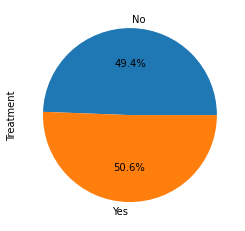

In [11]:
#Plot pie chart of % total of people who seeked treatment or not
mental_health_df.treatment.str.get_dummies().sum().plot.pie(label='Treatment', autopct='%1.1f%%')

In [12]:
mental_health_df["treatment"].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

### Observation:

 * 50.6% of the people surveyed have reported seeking treatment while the other 49.4% have reported to have not. 

## Does the size of the company affect whether more people seek treatment? 

In [13]:
# Create crosstab to see ratio between those that reported yes and no between sizes of company 
condition_count_company_size = pd.crosstab(mental_health_df['treatment'], mental_health_df['company_size'])
condition_count_company_size = condition_count_company_size[['Very Small', 'Small', 'Medium', 'Large', 'Extremely Large']]
condition_count_company_size.head()

company_size,Very Small,Small,Medium,Large,Extremely Large
treatment,,,,,
No,71,162,139,81,136
Yes,91,128,150,95,146


Text(0, 0.5, 'Count')

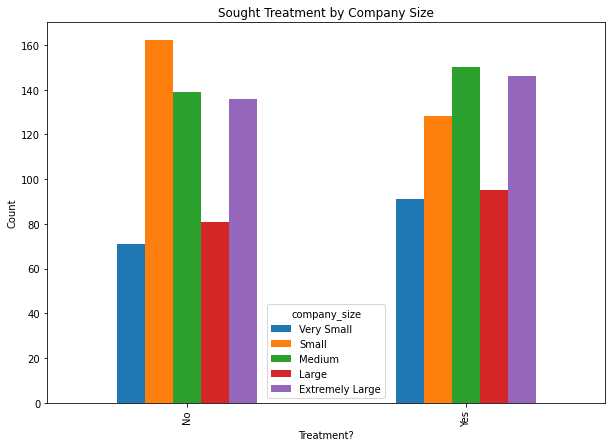

In [14]:
# Visualizing the ratio of yes and no to treatment reported by company size
condition_count_company_size.plot.bar(figsize=(10,7))
plt.title("Sought Treatment by Company Size")
plt.xlabel("Treatment?")
plt.ylabel("Count")

### Oberservation:

* Companies falling in medium and extremely large exhibit the most cases of people having sought out treatment, but also not having sought otu treatment yet either.

## What is the ratio of genders within the data? 

In [15]:
# Displayed counts of yes and no to treatment by gender
condition_count_gender = pd.crosstab(mental_health_df['treatment'], mental_health_df['Gender'], margins=True, margins_name='Total')
condition_count_gender = condition_count_gender[['Male', 'Female']]
condition_count_gender.head()

Gender,Male,Female
treatment,,
No,543,78
Yes,451,173
Total,994,251


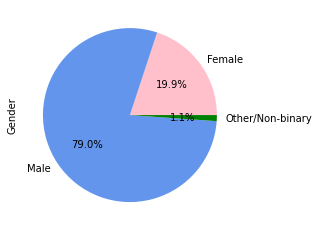

In [16]:
# Gender ratio within the data
mental_health_df.Gender.str.get_dummies().sum().plot.pie(label='Gender', autopct='%1.1f%%', colors = ['pink', 'cornflowerblue', 'green'])

### Observation: 

* Males make up most of the gender data, however the data is assumed to be focused on tech companies which is typically predominated by males.  

## What is the range of ages within the data?

In [17]:
# Descriptive stats of lower and higher bounds for age
mental_health_df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [18]:
# Check to see whether there are age outliers within the data
error = mental_health_df['Age'] > 80
error.head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [19]:
# Check to see whether there are age outliers within the data
error.value_counts()

False    1257
True        2
Name: Age, dtype: int64

In [20]:
# Located the row numbers with outliers
mental_health_df.iloc[error.values]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,Small
390,2014-08-27 15:24:47,99999999999,Other/Non-binary,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,Very Small


In [21]:
# Drop outliers
mental_health_df.drop(index=[364, 390], inplace = True)

In [22]:
# Check to see whether there are more age outliers within the data
errorerror = mental_health_df['Age'] < 16
errorerror.head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [23]:
# Check to see whether there are more age outliers within the data
errorerror.value_counts()

False    1251
True        6
Name: Age, dtype: int64

In [24]:
# Locating outlier row numbers
mental_health_df.iloc[errorerror.values]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,Extremely Large
715,2014-08-28 10:07:53,-1726,Male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,Medium
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,Large
989,2014-08-29 09:10:58,8,Other/Non-binary,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very Small
1090,2014-08-29 17:26:15,11,Male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,Very Small
1127,2014-08-30 20:55:11,-1,Other/Non-binary,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very Small


In [25]:
# Drop outliers
mental_health_df.drop(index=[143, 715, 734, 989, 1090, 1127], inplace = True)

In [26]:
# Check whether the age range looks 'normal' now
mental_health_df['Age'].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [27]:
# Binning ages of individuals into buckets to categorize
bin_edges = [10, 19, 29, 39, 49, 59, 69, 79, 89]
bin_names = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
mental_health_df['age_bucket'] = pd.cut(mental_health_df['Age'], bin_edges, labels=bin_names)
mental_health_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size,age_bucket
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Small,30-39
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,Extremely Large,40-49
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Small,30-39
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Medium,30-39
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Large,30-39


In [28]:
# Count of number of yes and no to treatment by age range
condition_count_age = pd.crosstab(mental_health_df['treatment'], mental_health_df['age_bucket'])
condition_count_age.head()

age_bucket,10-19,20-29,30-39,40-49,50-59,60-69,70-79
treatment,,,,,,,
No,9,265,269,62,11,3,0
Yes,7,235,285,87,15,2,1


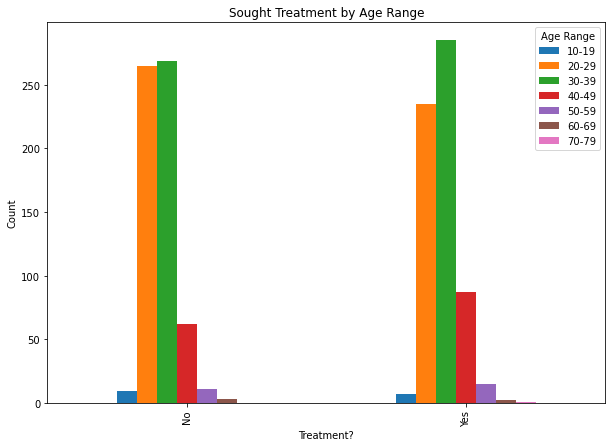

In [29]:
# Chart of count of yes and no by age range
condition_count_age.plot.bar(figsize=(10,7))

plt.title("Sought Treatment by Age Range")
plt.xlabel("Treatment?")
plt.ylabel('Count')
plt.legend().set_title('Age Range')

### Observation: 

* The most individuals experience mental health issues between the ages of 20-39.

## Do people that report a family history of mental health issues also experience mental health issues themselves? 

In [30]:
# Getting a count of how many people reported a family history of mental health
family_history = mental_health_df['family_history'] == 'Yes'
family_history.head()

0    False
1    False
2    False
3     True
4    False
Name: family_history, dtype: bool

In [31]:
family_history.value_counts()

False    762
True     489
Name: family_history, dtype: int64

In [32]:
# Create a new dataframe with all individuals that reported yes to a family history of mental health
family_history_yes = mental_health_df.iloc[family_history.values]
family_history_yes.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size,age_bucket
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Medium,30-39
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,Small,30-39
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,Very Small,30-39
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,Large,40-49
12,2014-08-27 11:33:23,42,Female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,Medium,40-49


In [33]:
# Ratio of those that reported yes to family history of mental health and have or havent sought out treatment themselves
count_yes_yes = family_history_yes.groupby(['family_history', 'treatment']).size()
count_yes_yes

family_history  treatment
Yes             No           127
                Yes          362
dtype: int64

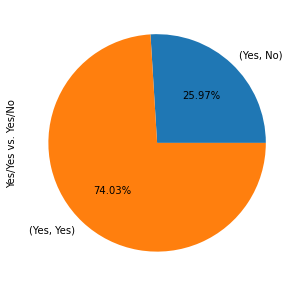

In [34]:
# Create a pie chart to display the ratio
plot = count_yes_yes.plot.pie(label = 'Yes/Yes vs. Yes/No', autopct='%1.2f%%', figsize=(5, 5))

### Observation: 

* 74.03% of surveyors reported that they had a family history of mental health issues and had went to seek treatment themselves while 25.97% have a reported a family history of mental health issues but have not sought treatment. 

##  What is the consensus on whether employers offer resources to learn about mental health awareness and options to seek help, as well as whether there would be a negative consequence discussing about it at work?

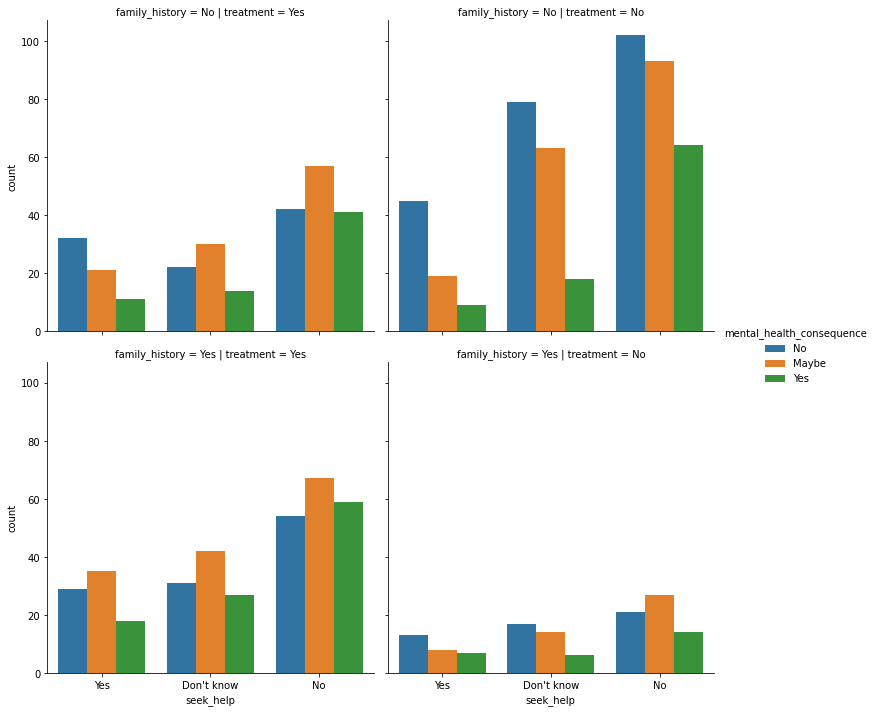

In [35]:
# Crosstab a catplot with various variables
sns.catplot(x='seek_help', hue='mental_health_consequence', col='treatment', row='family_history', kind='count', data=mental_health_df)

### Observation: 

* Generally, the employers that do offer resources to seek help, have employees who feel like that can discuss mental health with their employee with no issues. However many people also report that those employers that do not offer resources to seek help also believe their would be a negative consequence discussing mental health with their employer.

## How do companies in various sizes view mental health issues?

In [36]:
# Number of yes/no per company size of individuals reporting mental health discussion consequences

consequence_yes_no = pd.crosstab(mental_health_df['company_size'], mental_health_df['mental_health_consequence'] )
consequence_yes_no.head()

mental_health_consequence,Maybe,No,Yes
company_size,,,
Very Small,50,73,35
Large,70,66,39
Medium,106,117,65
Very Large,30,17,13
Small,107,127,55


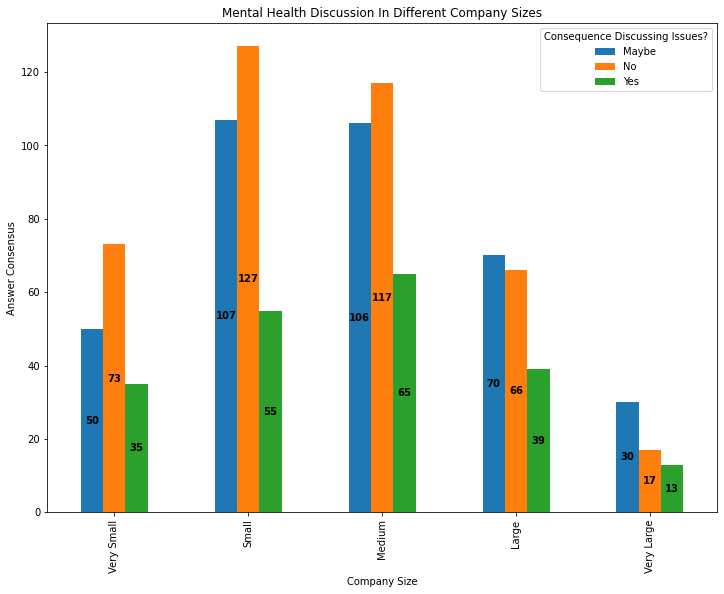

In [37]:
# Create a chart visualizing answers to whether there would be a consequence discussing mental health by company size
company_order =['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
ax = consequence_yes_no.reindex(company_order).plot(kind='bar', stacked=False, figsize=(12,9))

plt.title("Mental Health Discussion In Different Company Sizes")
plt.xlabel("Company Size")
plt.ylabel("Answer Consensus")
plt.legend().set_title('Consequence Discussing Issues?')

# Adds corresponding value annotations to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontweight='bold')

### Observation:

*  In regards to each company size, most people answered that there wouldn't be an issue discussing mental health with an employer. 

## How easy would it be to take a mental health break based on how often they have work interference from mental health issues? 

In [38]:
# Create a crosstab to see how people respond to the ease of taking a mental health break to how often they experience it
work_intereference = pd.crosstab(mental_health_df['work_interfere'], mental_health_df['leave'] )
work_intereference.head()

leave,Don't know,Somewhat difficult,Somewhat easy,Very difficult,Very easy
work_interfere,,,,,
Never,111,15,44,6,36
Often,44,17,37,23,19
Rarely,78,17,39,11,28
Sometimes,188,62,93,50,71


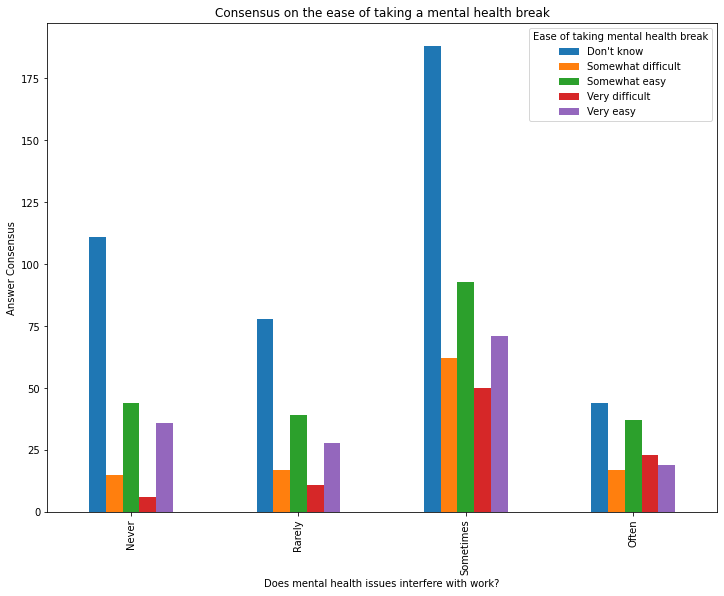

In [39]:
# Create a grouped bar chart to visualize the sentiment
interference_order =['Never', 'Rarely', 'Sometimes', 'Often']
ax1 = work_intereference.reindex(interference_order).plot(kind='bar', stacked=False, figsize=(12,9))

plt.title("Consensus on the ease of taking a mental health break")
plt.xlabel("Does mental health issues interfere with work?")
plt.ylabel("Answer Consensus")
plt.legend().set_title('Ease of taking mental health break')

### Observation: 

* Most people reported that they actually dont know how easy it is which could indicate employers don't discuss the topic on mental health. However between those that do know, most reported that it would be pretty easy to get a break.  

## Do tech companies typically offer remote work options? 

In [40]:
remote_work = pd.crosstab(mental_health_df['treatment'], mental_health_df['remote_work'] )
remote_work.head()

remote_work,No,Yes
treatment,,
No,443,176
Yes,437,195


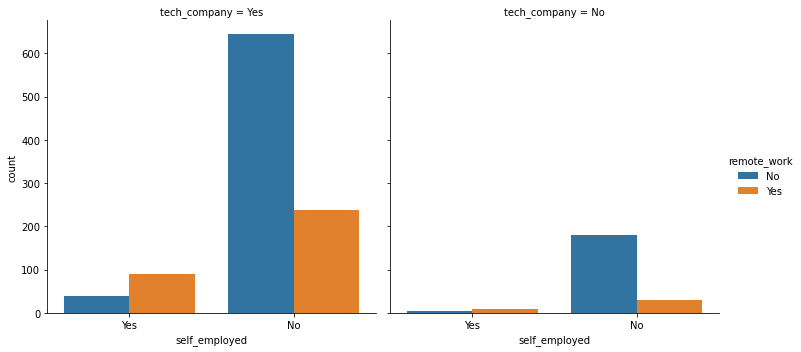

In [41]:
# Create catplot comparing whether tech companies offer remote work or not to being self employed or not
sns.catplot(x='self_employed', hue='remote_work', col='tech_company', kind='count', data=mental_health_df)

### Observation: 

* Most tech companies do not offer work from home options. 

## Do companies offering insight on care options provided by the company, benefits, and wellness programs have more individuals who have reported to sought help for mental health issues?

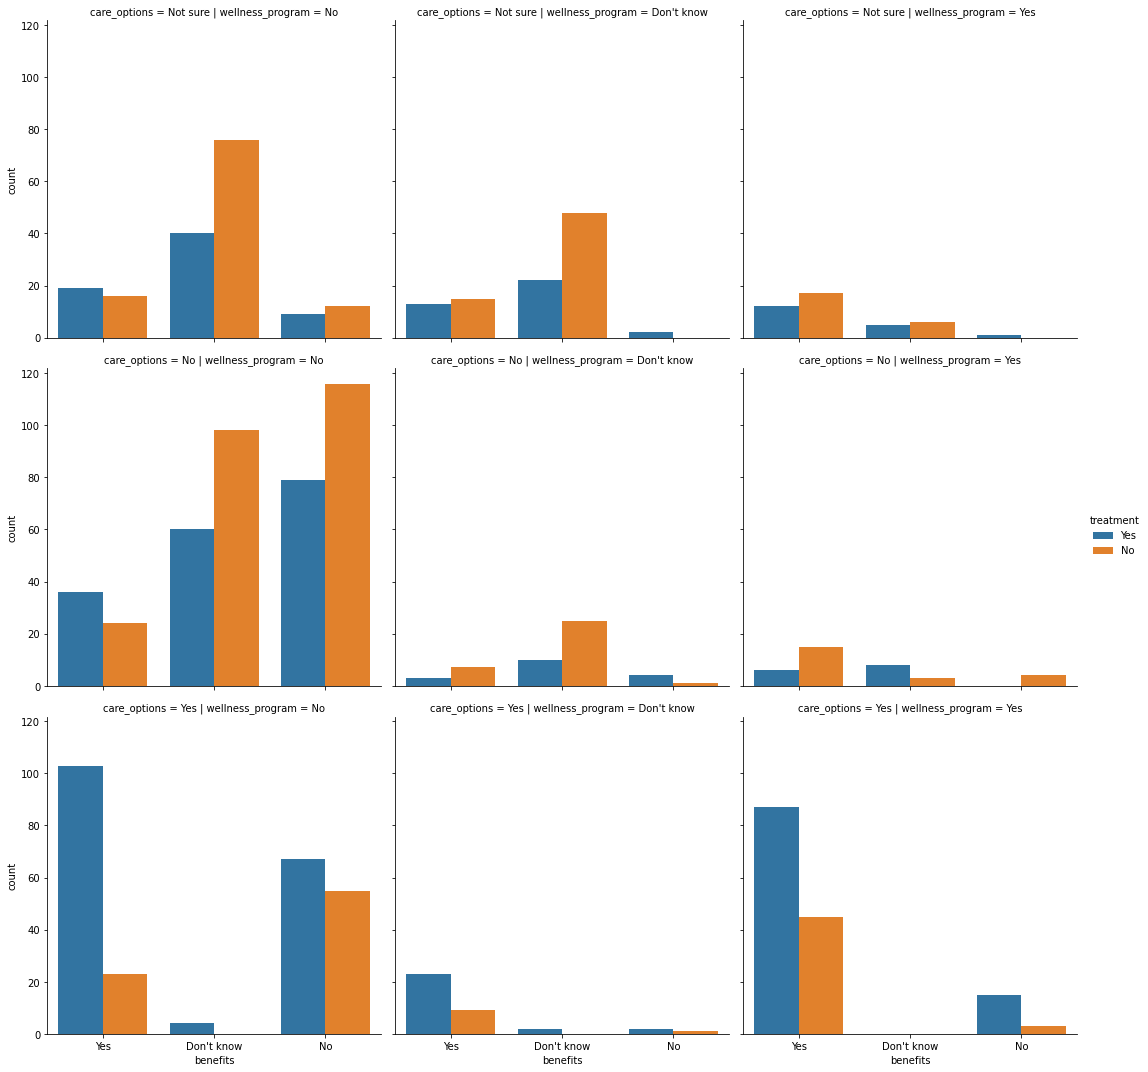

In [42]:
# Create crosstab catplot to visualize peoples responses on whether they are aware of the care options provided by their 
# companies to whether if their company offers benefits and wellness programs to whether they have received treatment or not. 

sns.catplot(x='benefits', hue='treatment', col='wellness_program', row='care_options',kind='count', data=mental_health_df)

### Observations: 

* Consensus is that companies not offering care options or wellness programs have more people not seeking treatment for their mental health issues, whereas companies offering benefits and care options at minimum whether they offer wellness or not, do seek treatment.

## Which countries or states report the most cases for mental health issues? 

In [43]:
# Get a unique list of the countries in the data
unique_countries = mental_health_df['Country'].unique()
print(unique_countries)

['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']


In [44]:
# Get a unique list of the states in the data
unique_states = mental_health_df['state'].unique()
print(unique_states)

['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


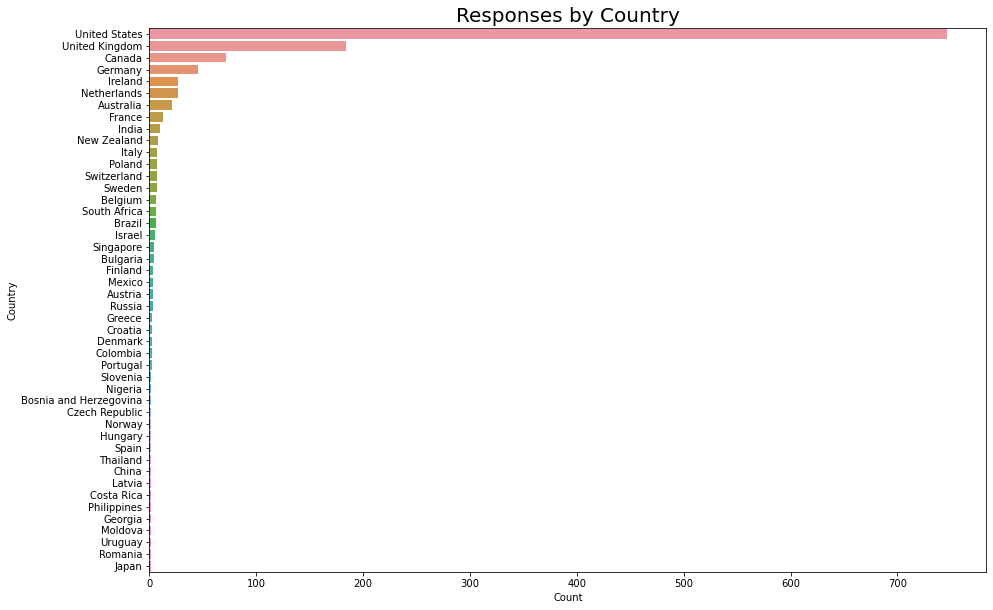

In [45]:
# Plot the count for each country
plt.figure(figsize=(15, 10))
sns.countplot(y='Country', order = mental_health_df['Country'].value_counts().index, data=mental_health_df)
plt.title('Responses by Country', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

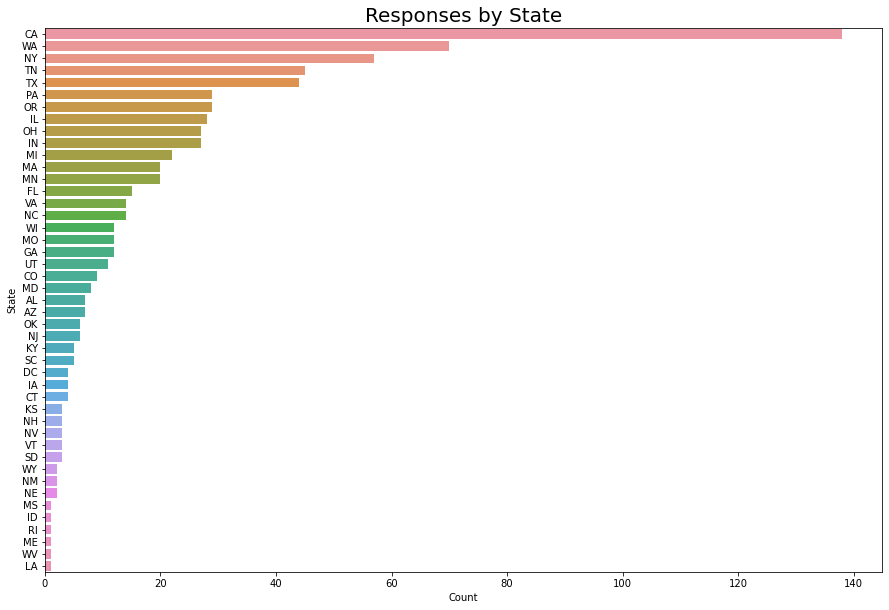

In [46]:
# Plot the count for each State
plt.figure(figsize=(15, 10))
sns.countplot(y='state', order = mental_health_df['state'].value_counts().index, data=mental_health_df)
plt.title('Responses by State', fontsize=20)
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

In [47]:
# Defining regional bins for the different states and categorizing them into their respective regions
# Get a count of how many instances are reported within each region

mental_health_df['region'] = mental_health_df['state']

west = ["CA", "OR", "WA", "ID", "NV", "AZ", "UT", "MT", "WY", "CO", "NM", "HI", "AK"]
midwest = ["ND", "SD", "NE", "KS", "MO", "IA", "MN", "WI", "IL", "IN", "MI", "OH"]
south = ["TX", "OK", "AR", "LA", "MS", "AL", "GA", "FL", "SC", "TN", "NC", "KY", "WV", "VA", "DC", "MD", "DE"]
northeast = ["PA", "NJ", "NY", "RI", "CT", "MA", "VT", "NH", "ME"]

mental_health_df['region'] = mental_health_df['region'].apply(lambda x:"West" if x in west else x)
mental_health_df['region'] = mental_health_df['region'].apply(lambda x:"Midwest" if x in midwest else x)
mental_health_df['region'] = mental_health_df['region'].apply(lambda x:"South" if x in south else x)
mental_health_df['region'] = mental_health_df['region'].apply(lambda x:"Northeast" if x in northeast else x)

region_column = pd.crosstab(index = mental_health_df['region'], columns = "count")
region_column.head()


col_0,count
region,
Midwest,160
Northeast,124
South,182
West,272


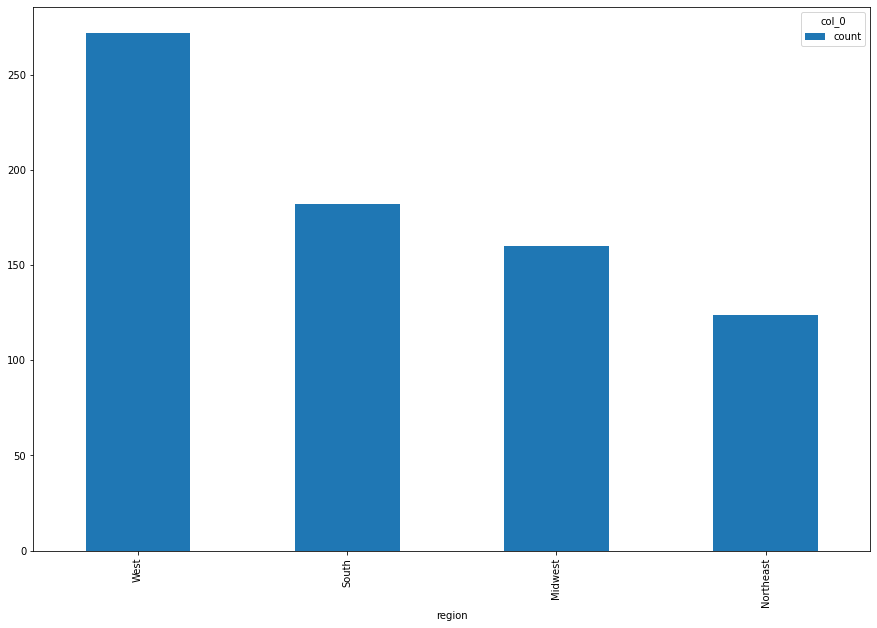

In [48]:
# Chart of on the count of surveyor by region
region_column.sort_values('count', ascending=False).plot(kind="bar", figsize=(15,10), stacked=True)

In [49]:
#unique values in work_interference column
unique_work_interfere = mental_health_df['work_interfere'].unique()
print(unique_work_interfere)

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [50]:
unique_work_interfere_no_na = mental_health_df['work_interfere'].dropna().unique()
print(unique_work_interfere_no_na)

['Often' 'Rarely' 'Never' 'Sometimes']


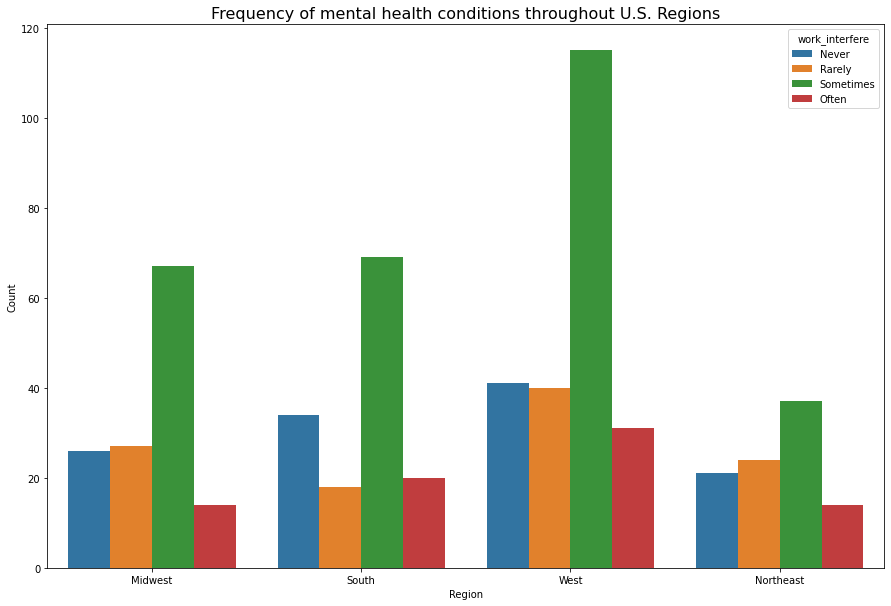

In [51]:
# Chart visualizing how work interference due to mental health issues affect people based on region
plt.figure(figsize=(15,10))
sns.countplot(x="region", hue="work_interfere", hue_order = ["Never", "Rarely", "Sometimes", "Often"], data=mental_health_df)
plt.title("Frequency of mental health conditions throughout U.S. Regions", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [52]:
# List of unique values in work_interference
mental_health_df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [53]:
# Create new column categorizing answers to work interference into Yes/No and N/A for NaN
mental_health_df['interference'] = mental_health_df['work_interfere']

mental_health_df['interference'] = mental_health_df['interference'].replace(np.nan, 'N/A', regex=True)

nan = ["N/A"]
never = ["Never"]
interference_yes = ["Rarely", "Sometimes", "Often"]

mental_health_df['interference'] = mental_health_df['interference'].apply(lambda x: "Yes" if x in interference_yes else x)
mental_health_df['interference'] = mental_health_df['interference'].apply(lambda x: "No" if x in never else x)
mental_health_df['interference'] = mental_health_df['interference'].apply(lambda x: "N/A" if x in nan else x)

interference_yes_no = pd.crosstab(index = mental_health_df['interference'], columns = "count")
interference_yes_no.head()

col_0,count
interference,
N/A,262
No,212
Yes,777


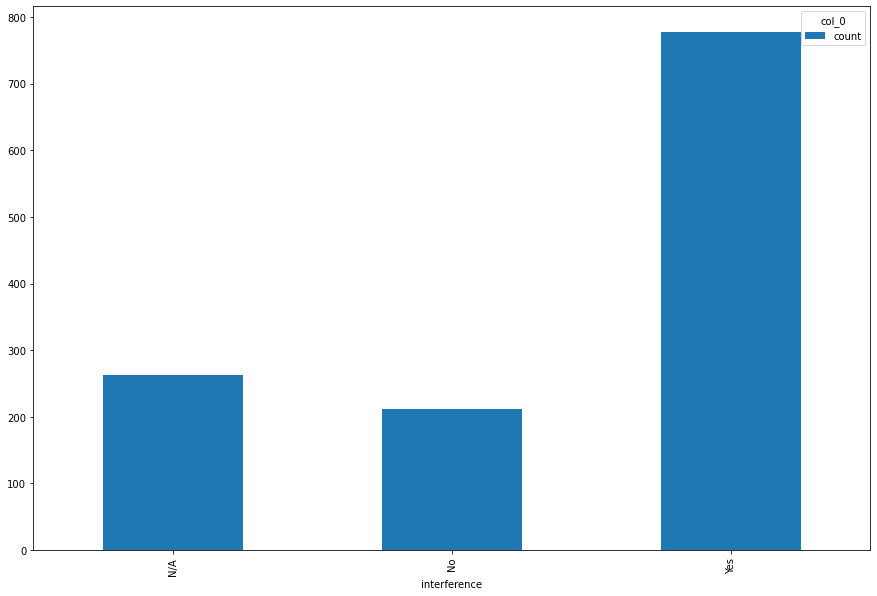

In [54]:
# Create bar charts visualizing results
interference_yes_no.plot(kind="bar", figsize=(15,10), stacked=True)

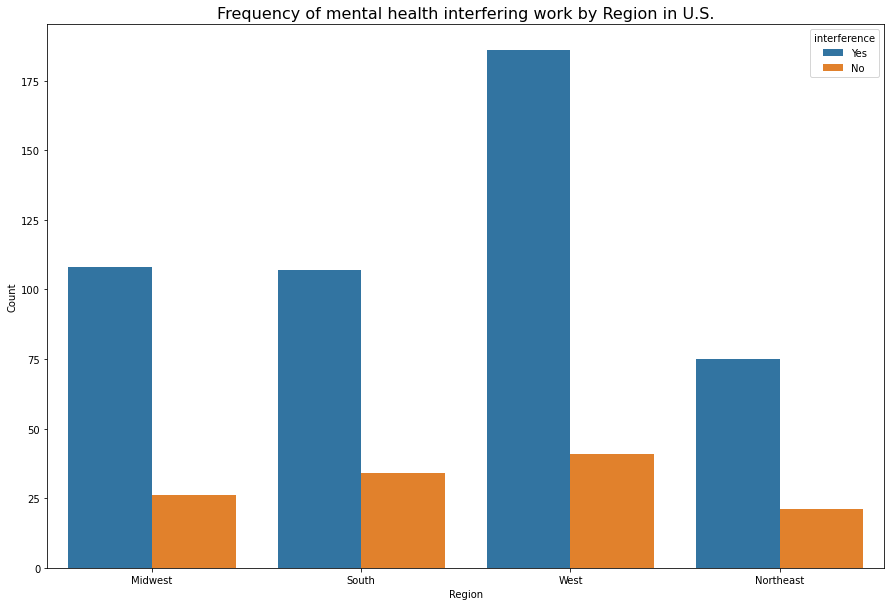

In [55]:
# Create a chart visualizing which region is affected more when it comes to interference from mental health issues
plt.figure(figsize=(15,10))
sns.countplot(x="region", hue="interference", hue_order = ["Yes", "No"], data=mental_health_df)
plt.title("Frequency of mental health interfering work by Region in U.S.", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [56]:
# List the unique values in mental_health_consequence
mental_health_df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [57]:
# Create a new column categorizing sentiment on whether people think they would be a positive or negative experience discussing mental health
mental_health_df['consequence'] = mental_health_df['mental_health_consequence']

positive = ["No"]
negative = ["Yes"]
in_between = ["Maybe"]

mental_health_df['consequence'] = mental_health_df['consequence'].apply(lambda x: "Positive" if x in positive else x) 
mental_health_df['consequence'] = mental_health_df['consequence'].apply(lambda x: "Negative" if x in negative else x) 
mental_health_df['consequence'] = mental_health_df['consequence'].apply(lambda x: "In Between" if x in in_between else x) 

consequence_crosstab = pd.crosstab(index=mental_health_df['consequence'], columns="count")

consequence_crosstab.head()

col_0,count
consequence,
In Between,476
Negative,288
Positive,487


Text(0, 0.5, 'count')

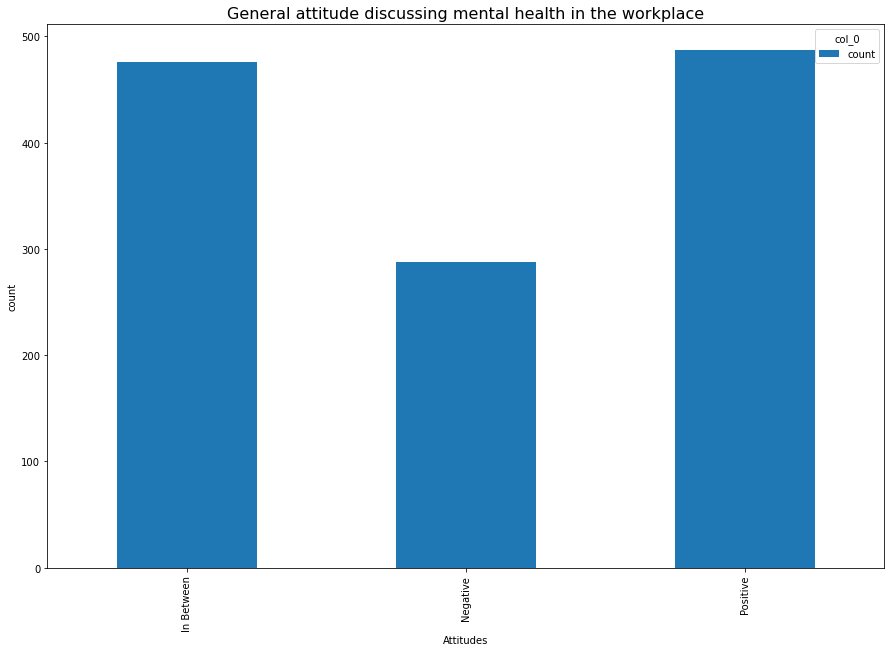

In [58]:
# Chart the results on surveyor sentiment 
consequence_crosstab.plot(kind="bar", figsize=(15,10), stacked=True)
plt.title("General attitude discussing mental health in the workplace", fontsize=16)
plt.xlabel("Attitudes")
plt.ylabel("count")

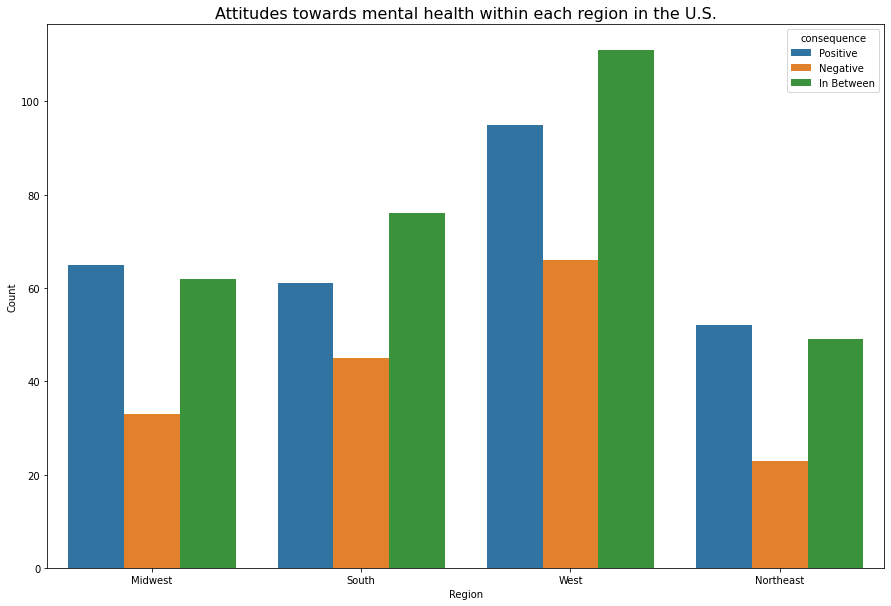

None


In [59]:
# Chart the attitudes regarding the consequences in discussing mental health by region in the US
plt.figure(figsize=(15,10))
sns.countplot(x="region", hue="consequence", hue_order = ["Positive", "Negative", "In Between"], data=mental_health_df)
plt.title("Attitudes towards mental health within each region in the U.S.", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Count")
print(plt.show())

## Is there a correlation between people seeking treatment to whether they experience work interference? 

In [60]:
# Create a new dataframe from original
df = mental_health_df

In [61]:
# Drop NaN
df['work_interfere'].dropna().unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [62]:
# Create a crosstab of values for chi^2 test
treatment_work_interfere = pd.crosstab(df['work_interfere'], df['treatment'], margins = False )

treatment_work_interfere.columns = ["Treatment: Yes","Treatment: No"]
treatment_work_interfere.index = ["Work Interference: Often","Work Interference: Rarely","Work Interference: Sometimes", "Work Interference: Never",]

print(treatment_work_interfere)

                              Treatment: Yes  Treatment: No
Work Interference: Often                 182             30
Work Interference: Rarely                 21            119
Work Interference: Sometimes              51            122
Work Interference: Never                 107            357


In [63]:
# Assign numerical codes to categorical values to be able to do a pearsonr corr test
corr = pd.DataFrame({'treatment': df['treatment'], 'work_interfere': df['work_interfere']}, dtype='category')
cat_num = corr.apply(lambda x: x.cat.codes)

# Run a correlation calculation 
print("Pearson:", cat_num.corr())

Pearson:                 treatment  work_interfere
treatment        1.000000        0.615075
work_interfere   0.615075        1.000000


### Observation:

* There seems to be a moderate correlation between those that seek treatment and experience work interference.

## Is there a significance to the correlation of the two variables? 

* Null hypothesis (H0): The two variables are independent.
* Alternative hypothesis (H1): The two variables are not independent.

In [64]:
# Chi^2 test (test stat, p-value of the test, degrees of freedom, expected values)
chi2_contingency(treatment_work_interfere)

(290.5096289698427,
 1.1262718341798323e-62,
 3,
 array([[ 77.38321537, 134.61678463],
        [ 51.10212336,  88.89787664],
        [ 63.14762386, 109.85237614],
        [169.36703741, 294.63296259]]))

In [65]:
# Get P value

significance = 0.05
p = 1 - significance
dof = chi2_contingency(treatment_work_interfere)[2]
critical_value = chi2.ppf(p, dof)
critical_value

7.814727903251179

In [66]:
# Confirm degree of freedom to critical value
p = chi2.cdf(critical_value, dof)
p

0.9500000000000001

In [67]:
# Test the significance of the chi^2 test

chi, pval, dof, exp = chi2_contingency(treatment_work_interfere)
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  1.1262718341798323e-62
chi=290.509629, critical value=7.814728

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


## Is there a correlation between people who have a family history of mental health and those that end up getting treatment? 

In [71]:
df_test = df

In [72]:
# Convert Yes/No categorical values in family history and treatment to 0/1
label_encoder = LabelEncoder()
df_test['family_history'] = label_encoder.fit_transform(df_test['family_history'])
df_test['treatment'] = label_encoder.fit_transform(df_test['treatment'])

df_test.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size,age_bucket,region,interference,consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,0,1,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Small,30-39,Midwest,Yes,Positive
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,0,0,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,Extremely Large,40-49,Midwest,Yes,In Between
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,0,0,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Small,30-39,NaN,Yes,Positive
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,1,1,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Medium,30-39,NaN,Yes,Negative
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,0,0,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Large,30-39,South,No,Positive


In [73]:
# Run a pearson r correlation test
stats.pearsonr(df_test['family_history'], df_test['treatment'])

(0.3766737770397155, 1.8848728431096164e-43)

### Observation:

* There seems to be a moderate correlation between those that seek treatment and experience work interference.

## Is there a significance to that correlation? 

* Null hypothesis (H0): The two variables are independent. 
* Alternative hypothesis (H1): The two variables are not independent.

In [74]:
# Create a crosstab of values for chi^2 test
treatment_fam_history = pd.crosstab(df['family_history'], df['treatment'], margins = False )

treatment_fam_history.columns = ["Treatment: Yes","Treatment: No"]
treatment_fam_history.index = ["Fam History: Yes","Fam History: No"]

print(treatment_fam_history)

                  Treatment: Yes  Treatment: No
Fam History: Yes             492            270
Fam History: No              127            362


In [75]:
# Chi^2 test (test stat, p-value of the test, degrees of freedom, expected values)
chi2_contingency(treatment_fam_history)

(175.95516961872426,
 3.703610823400622e-40,
 1,
 array([[377.04076739, 384.95923261],
        [241.95923261, 247.04076739]]))

In [76]:
# Get P value
significance = 0.05
p = 1 - significance
dof = chi2_contingency(treatment_fam_history)[2]
critical_value = chi2.ppf(p, dof)
critical_value

3.841458820694124

In [77]:
# Test the significance of the chi^2 test

chi, pval, dof, exp = chi2_contingency(treatment_fam_history)
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypothesis and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypothesis. 
They are independent.""" % (significance))

p-value is:  3.703610823400622e-40
chi=175.955170, critical value=3.841459

At 0.05 level of significance, we reject the null hypothesis and accept H1. 
They are not independent.
